In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
X1 = np.linspace(-5, 5, 100)
y1 = np.sqrt(10**2 - X1**2)
y1 = np.hstack([y1, -y1])
X1 = np.hstack([X1, X1])

In [20]:
X2 = np.linspace(-5, 5, 100)
y2 = np.sqrt(5**2 - X2**2)
y2 = np.hstack([y2, -y2])
X2 = np.hstack([X2, X2])

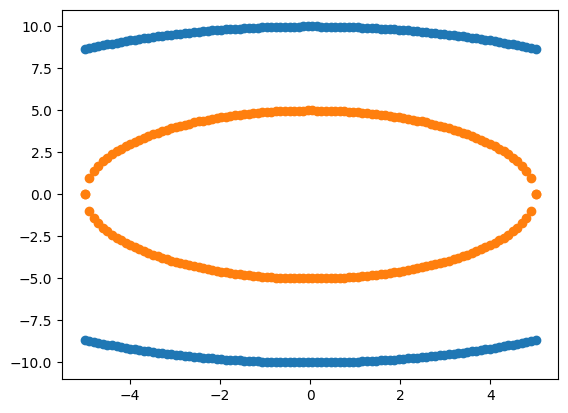

In [21]:
plt.scatter(X1, y1)
plt.scatter(X2, y2)

In [22]:
np.vstack([X1, y1]).T

array([[-5.        ,  8.66025404],
       [-4.8989899 ,  8.71779204],
       [-4.7979798 ,  8.77378994],
       [-4.6969697 ,  8.82827705],
       [-4.5959596 ,  8.88128118],
       [-4.49494949,  8.93282873],
       [-4.39393939,  8.98294476],
       [-4.29292929,  9.03165312],
       [-4.19191919,  9.07897646],
       [-4.09090909,  9.12493632],
       [-3.98989899,  9.16955321],
       [-3.88888889,  9.21284664],
       [-3.78787879,  9.25483518],
       [-3.68686869,  9.29553652],
       [-3.58585859,  9.3349675 ],
       [-3.48484848,  9.37314414],
       [-3.38383838,  9.41008171],
       [-3.28282828,  9.44579475],
       [-3.18181818,  9.4802971 ],
       [-3.08080808,  9.51360192],
       [-2.97979798,  9.54572176],
       [-2.87878788,  9.57666854],
       [-2.77777778,  9.60645359],
       [-2.67676768,  9.63508769],
       [-2.57575758,  9.66258107],
       [-2.47474747,  9.68894344],
       [-2.37373737,  9.714184  ],
       [-2.27272727,  9.73831149],
       [-2.17171717,

In [31]:
df1 = pd.DataFrame(np.vstack([X1, y1]).T, columns=['X', 'y'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([X2, y2]).T, columns=['X', 'y'])
df2['Y'] = 1
df = df1.add(df2)

In [46]:
df = pd.concat([df1, df2])

In [50]:
df.shape

(400, 3)

In [51]:
X = df.drop('Y', axis=1)
y = df['Y']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [54]:
y_test

9      1
80     1
33     0
10     1
93     0
      ..
46     1
27     1
169    1
176    0
89     1
Name: Y, Length: 80, dtype: int64

In [57]:
df

,X,y,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0
...,...,...,...
195,4.59596,-1.969049,1
196,4.69697,-1.714198,1
197,4.79798,-1.406908,1
198,4.89899,-0.999949,1


In [59]:
df['X1_square']=df['X']**2
df['X2_square']=df['y']**2
df['X1X2']=df['X']*df['y']

In [60]:
X_d = df.drop('Y', axis=1)
y_d = df['Y']

In [61]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

In [62]:
X_d_train

,X,y,X1_square,X2_square,X1X2
3,-4.696970,8.828277,22.061524,77.938476,-41.466150
18,-3.181818,9.480297,10.123967,89.876033,-30.164582
2,-4.797980,1.406908,23.020610,1.979390,-6.750316
50,0.050505,4.999745,0.002551,24.997449,0.252512
74,2.474747,4.344609,6.124375,18.875625,10.751809
...,...,...,...,...,...
71,2.171717,9.761334,4.716355,95.283645,21.198857
106,-4.393939,-8.982945,19.306703,80.693297,39.470515
70,2.070707,4.551063,4.287828,20.712172,9.423918
148,-0.151515,-4.997704,0.022957,24.977043,0.757228


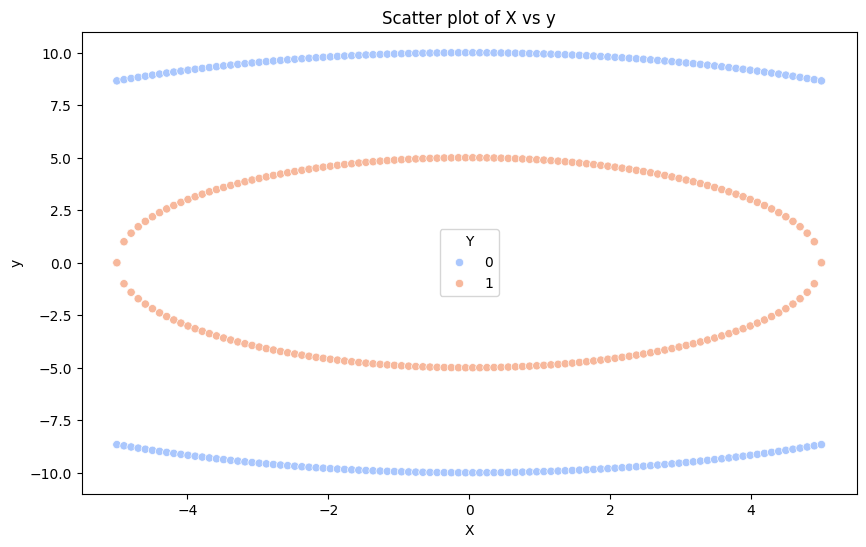

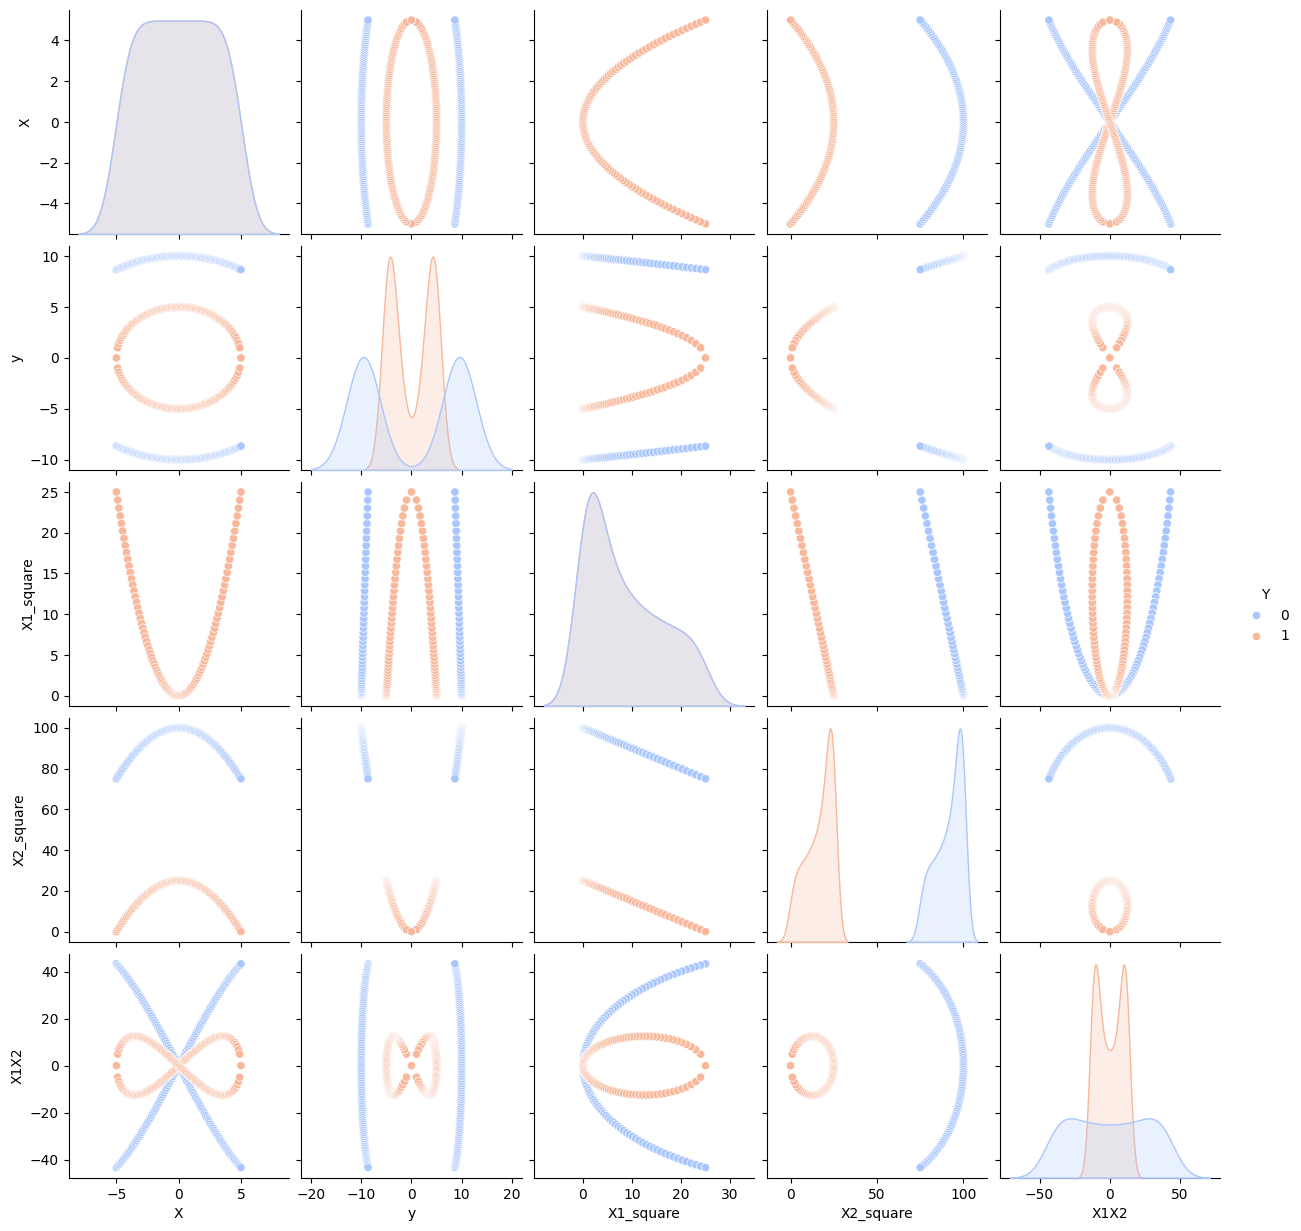

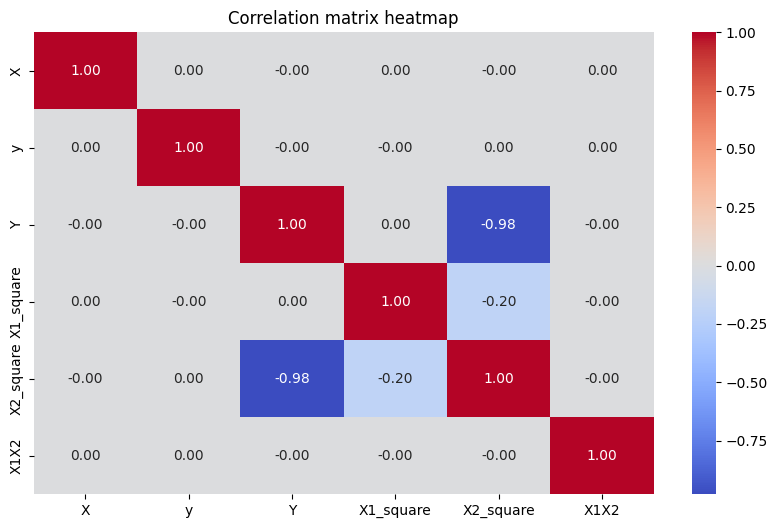

In [63]:
# Scatter plot for X and y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='X', y='y', hue='Y', palette='coolwarm')
plt.title('Scatter plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(title='Y')
plt.show()

# Pair plot for the dataframe
sns.pairplot(df, hue='Y', palette='coolwarm')
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix heatmap')
plt.show()

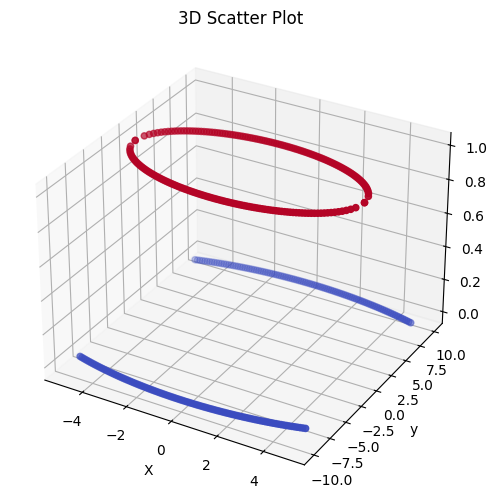

In [64]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df['X'], df['y'], df['Y'], c=df['Y'], cmap='coolwarm')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot')

plt.show()

In [67]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_d_train, y_d_train)
svc.score(X_d_test, y_d_test)

1.0

In [70]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_d_train, y_train)
svc.score(X_d_test, y_test)

1.0

In [69]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

1.0